# 오피스텔_실거래가

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
officetel23 = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/오피스텔(전월세)_실거래가_2023.csv', header=15, encoding='cp949')
officetel24 = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/오피스텔(전월세)_실거래가_2024.csv', header=15, encoding='cp949')

C:\Users\emily\AppData\Local\Temp\ipykernel_27272\123145871.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  officetel24 = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/오피스텔(전월세)_실거래가_2024.csv', header=15, encoding='cp949')


In [3]:
officetel23

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원)
0,1,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,월세,20.62,202312,30,"1,000",60,19,2015.0,천호대로 257,202401~202501,신규,-,NaN,NaN
1,2,서울특별시 종로구 종로5가,138-4,138,4,종로5가역 하이뷰더광장,월세,18.97,202312,30,"1,000",110,9,2022.0,종로 210,202402~202502,신규,-,NaN,NaN
2,3,서울특별시 동대문구 답십리동,530-17,530,17,한성아펠시티,월세,29.93,202312,30,"22,000",13,7,2019.0,황물로 168,202312~202512,갱신,-,"22,000",0.0
3,4,서울특별시 동대문구 답십리동,494-1,494,1,한일노벨리아,월세,19.05,202312,30,"2,000",55,9,2016.0,천호대로 289,202402~202602,신규,-,NaN,NaN
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,"13,000",0,11,2015.0,천호대로 257,202401~202601,갱신,-,"3,000",45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73549,73550,서울특별시 은평구 녹번동,35-21,35,21,녹번동메카오피스텔,월세,20.51,202301,1,500,58,5,2003.0,통일로 635,202301~202401,갱신,-,500,55.0
73550,73551,서울특별시 마포구 공덕동,17-67,17,67,헤이븐 오피스텔,전세,20.36,202301,1,"15,330",0,6,2020.0,만리재로 99,202301~202401,신규,-,NaN,NaN
73551,73552,서울특별시 강서구 가양동,250-2,250,2,다솔씨티하임,전세,36.69,202301,1,"20,000",0,4,2018.0,양천로49길 47,202303~202503,신규,-,NaN,NaN
73552,73553,서울특별시 강서구 마곡동,793,793,0,유림트윈파크,전세,19.99,202301,1,"13,500",0,6,2015.0,강서로 419,202302~202502,신규,-,NaN,NaN


## 전처리

#### 전월세구분 : “전세”

In [4]:
# 전세만 필터링
officetel23_df = officetel23[officetel23['전월세구분']=='전세']
officetel24_df = officetel24[officetel24['전월세구분']=='전세']

In [5]:
officetel23_df['월세금(만원)'] = officetel23_df['월세금(만원)'].astype(str).str.replace(',', '').astype(int)
officetel24_df['월세금(만원)'] = officetel24_df['월세금(만원)'].astype(str).str.replace(',', '').astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_27272\4131267647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['월세금(만원)'] = officetel23_df['월세금(만원)'].astype(str).str.replace(',', '').astype(int)
C:\Users\emily\AppData\Local\Temp\ipykernel_27272\4131267647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['월세금(만원)'] = officetel24_df['월세금(만원)'].astype(str).str.replace(',', '').astype(int)


In [6]:
# 보증금(만원) 컬럼 타입 변환 (object -> int)
officetel23_df['보증금(만원)'] = officetel23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel23_df['보증금(만원)'] = pd.to_numeric(officetel23_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_27272\2480818449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['보증금(만원)'] = officetel23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_27272\2480818449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel23_df['보증금(만원)'] = pd.to_numeric(officetel23_df['보증금(만원)']).astype(int)


In [7]:
officetel24_df['보증금(만원)'] = officetel24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel24_df['보증금(만원)'] = pd.to_numeric(officetel24_df['보증금(만원)']).astype(int)

C:\Users\emily\AppData\Local\Temp\ipykernel_27272\570142075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['보증금(만원)'] = officetel24_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
C:\Users\emily\AppData\Local\Temp\ipykernel_27272\570142075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel24_df['보증금(만원)'] = pd.to_numeric(officetel24_df['보증금(만원)']).astype(int)


#### 보증금(만원) : 전세금

In [8]:
officetel23_df = officetel23_df.rename(columns = {'보증금(만원)':'전세금'})
officetel24_df = officetel24_df.rename(columns = {'보증금(만원)':'전세금'})

#### 계약년월 + 계약일 ⇒ 계약시기

In [9]:
officetel23_df['계약시기'] = pd.to_datetime(officetel23_df['계약년월'].astype(str) + officetel23_df['계약일'].astype(str))
officetel24_df['계약시기'] = pd.to_datetime(officetel24_df['계약년월'].astype(str) + officetel24_df['계약일'].astype(str))

#### 계약년월 ⇒ 2023-06-01부터 

In [10]:
officetel23_df = officetel23_df[officetel23_df['계약시기']>='2023-06-01']
officetel23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,...,0,11,2015.0,천호대로 257,202401~202601,갱신,-,"3,000",45.0,2023-12-30
5,6,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,0,6,2019.0,도봉로136길 19,202401~202601,신규,-,NaN,NaN,2023-12-30
6,7,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,27.79,202312,30,...,0,17,2021.0,용마산로 636,202312~202512,갱신,-,"18,000",0.0,2023-12-30
13,14,서울특별시 동대문구 전농동,620-15,620,15,청량리역 우남SL타워300,전세,18.43,202312,30,...,0,18,2023.0,왕산로 186,202401~202601,신규,-,NaN,NaN,2023-12-30
16,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,0,3,2019.0,도봉로136길 19,-,-,-,NaN,NaN,2023-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41128,41129,서울특별시 양천구 목동,917-9,917,9,현대41타워,전세,47.19,202306,1,...,0,24,2001.0,목동동로 293,202306~202506,신규,-,NaN,NaN,2023-06-01
41130,41131,서울특별시 강서구 염창동,262,262,0,염창투웨니퍼스트,전세,28.57,202306,1,...,0,3,2019.0,공항대로81길 35,202306~202506,갱신,사용,"21,525",0.0,2023-06-01
41131,41132,서울특별시 마포구 대흥동,12-27,12,27,이대역 푸르지오 시티,전세,28.80,202306,1,...,0,18,2013.0,신촌로 170,202307~202407,신규,-,NaN,NaN,2023-06-01
41133,41134,서울특별시 마포구 상암동,1748,1748,0,상암 오벨리스크 2차,전세,25.48,202306,1,...,0,9,2014.0,,202306~202406,갱신,-,"17,000",0.0,2023-06-01


#### - 계약구분 ⇒ “-”는 “신규”
- 종전계약보증금(만원)의 경우 “신규”계약에 존재

In [11]:
officetel23_df['종전계약 보증금(만원)'] = officetel23_df['종전계약 보증금(만원)'].fillna(0)
officetel24_df['종전계약 보증금(만원)'] = officetel24_df['종전계약 보증금(만원)'].fillna(0)

In [12]:
officetel23_df['계약구분'] = officetel23_df['계약구분'].replace('-', '신규')
officetel23_df['계약구분'].value_counts()

계약구분
신규    12276
갱신     2825
Name: count, dtype: int64

In [13]:
officetel24_df['계약구분'] = officetel24_df['계약구분'].replace('-', '신규')
officetel24_df['계약구분'].value_counts()

계약구분
신규    19180
갱신     6266
Name: count, dtype: int64

In [14]:
officetel23_df[(officetel23_df['계약구분']=='신규')&(officetel23_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기


In [15]:
officetel24_df[(officetel24_df['계약구분']=='신규')&(officetel24_df['종전계약 보증금(만원)'] != 0)]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,월세금(만원),층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기


#### 구 / 동 

In [16]:
officetel23_df['구'] = officetel23_df['시군구'].str.extract(r'(\S+구)')
officetel23_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,...,11,2015.0,천호대로 257,202401~202601,갱신,-,"3,000",45.0,2023-12-30,동대문구
5,6,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,6,2019.0,도봉로136길 19,202401~202601,신규,-,0,NaN,2023-12-30,도봉구
6,7,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,27.79,202312,30,...,17,2021.0,용마산로 636,202312~202512,갱신,-,"18,000",0.0,2023-12-30,중랑구
13,14,서울특별시 동대문구 전농동,620-15,620,15,청량리역 우남SL타워300,전세,18.43,202312,30,...,18,2023.0,왕산로 186,202401~202601,신규,-,0,NaN,2023-12-30,동대문구
16,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,3,2019.0,도봉로136길 19,-,신규,-,0,NaN,2023-12-30,도봉구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41128,41129,서울특별시 양천구 목동,917-9,917,9,현대41타워,전세,47.19,202306,1,...,24,2001.0,목동동로 293,202306~202506,신규,-,0,NaN,2023-06-01,양천구
41130,41131,서울특별시 강서구 염창동,262,262,0,염창투웨니퍼스트,전세,28.57,202306,1,...,3,2019.0,공항대로81길 35,202306~202506,갱신,사용,"21,525",0.0,2023-06-01,강서구
41131,41132,서울특별시 마포구 대흥동,12-27,12,27,이대역 푸르지오 시티,전세,28.80,202306,1,...,18,2013.0,신촌로 170,202307~202407,신규,-,0,NaN,2023-06-01,마포구
41133,41134,서울특별시 마포구 상암동,1748,1748,0,상암 오벨리스크 2차,전세,25.48,202306,1,...,9,2014.0,,202306~202406,갱신,-,"17,000",0.0,2023-06-01,마포구


In [17]:
officetel24_df['구'] = officetel24_df['시군구'].str.extract(r'(\S+구)')
officetel24_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,층,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구
4,5,서울특별시 종로구 숭인동,1392-1,1392,1,종로 아인스빌,전세,17.88,202412,30,...,7,2013.0,난계로29가길 19,202502~202602,갱신,-,"14,700",0.0,2024-12-30,종로구
9,10,서울특별시 중구 오장동,148-16,148,16,남산 센트럴시티 투웨니퍼스트,전세,18.39,202412,30,...,15,2022.0,마른내로 115-1,202501~202701,신규,-,0,NaN,2024-12-30,중구
12,13,서울특별시 성동구 상왕십리동,750,750,0,노블리안,전세,30.81,202412,30,...,9,2003.0,왕십리로 390,202503~202703,갱신,사용,"16,500",0.0,2024-12-30,성동구
19,20,서울특별시 종로구 숭인동,1368,1368,0,숭인한성아펠시티,전세,21.45,202412,30,...,17,2021.0,난계로 257,202502~202702,신규,-,0,NaN,2024-12-30,종로구
32,33,서울특별시 성북구 석관동,343-2,343,2,filif,전세,29.98,202412,30,...,9,2024.0,화랑로 230,202502~202702,신규,-,0,NaN,2024-12-30,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84138,84139,서울특별시 은평구 응암동,599-38,599,38,위산엘리시움,전세,33.85,202401,1,...,5,2021.0,응암로11길 8,202401~202501,갱신,-,"25,300",0.0,2024-01-01,은평구
84142,84143,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,29.90,202401,1,...,20,2021.0,용마산로 636,202401~202601,신규,-,0,NaN,2024-01-01,중랑구
84145,84146,서울특별시 성북구 동선동1가,85-65,85,65,.,전세,17.72,202401,1,...,3,2013.0,동소문로24길 36,202401~202601,갱신,-,"8,000",0.0,2024-01-01,성북구
84150,84151,서울특별시 중구 중림동,363,363,0,쌍용 더 플래티넘 서울역,전세,17.25,202401,1,...,11,2023.0,청파로 454,202402~202602,신규,-,0,NaN,2024-01-01,중구


In [18]:
officetel23_df['동'] = officetel23_df['시군구'].str.split().str[-1]

In [19]:
officetel24_df['동'] = officetel24_df['시군구'].str.split().str[-1]

#### 종전계약월세(만원) ≠ 0인 경우

In [20]:
officetel23_df[officetel23_df['월세금(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구,동


In [21]:
officetel24_df[officetel24_df['월세금(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구,동


In [22]:
officetel23_df['종전계약 월세(만원)'] = officetel23_df['종전계약 월세(만원)'].fillna(0)
officetel24_df['종전계약 월세(만원)'] = officetel24_df['종전계약 월세(만원)'].fillna(0)

In [23]:
officetel23_df['종전계약 월세(만원)'] = (
    officetel23_df['종전계약 월세(만원)']
    .replace(',', '', regex=True)               # 쉼표 제거
    .replace('', np.nan)                        # 빈 문자열 → NaN
    .astype(float)                              # float으로 변환 (NaN 처리 포함)
    .fillna(0)                                  # NaN을 0으로 처리 (원하는 방식으로 조정)
    .astype(int)                                # 최종적으로 int로 변환
)

In [24]:
officetel24_df['종전계약 월세(만원)'] = (
    officetel24_df['종전계약 월세(만원)']
    .replace(',', '', regex=True)               # 쉼표 제거
    .replace('', np.nan)                        # 빈 문자열 → NaN
    .astype(float)                              # float으로 변환 (NaN 처리 포함)
    .fillna(0)                                  # NaN을 0으로 처리 (원하는 방식으로 조정)
    .astype(int)                                # 최종적으로 int로 변환
)

In [25]:
officetel23_df[officetel23_df['종전계약 월세(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구,동
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,...,2015.0,천호대로 257,202401~202601,갱신,-,"3,000",45,2023-12-30,동대문구,답십리동
266,267,서울특별시 강서구 마곡동,773,773,0,힐스테이트 에코 마곡역,전세,19.87,202312,29,...,2017.0,마곡중앙로 76,202401~202601,갱신,-,"4,000",50,2023-12-29,강서구,마곡동
1453,1454,서울특별시 마포구 서교동,338-39,338,39,eG PLUS 오피스텔,전세,20.46,202312,23,...,2001.0,와우산로 117,202401~202403,갱신,-,"12,000",13,2023-12-23,마포구,서교동
1917,1918,서울특별시 양천구 목동,917,917,0,목동파라곤,전세,82.69,202312,22,...,2004.0,목동서로 155,202401~202601,갱신,-,"20,000",130,2023-12-22,양천구,목동
2186,2187,서울특별시 금천구 가산동,140-31,140,31,지밸리마인드3차,전세,19.26,202312,21,...,2021.0,,202401~202601,갱신,-,"13,000",30,2023-12-21,금천구,가산동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37407,37408,서울특별시 동대문구 전농동,620-4,620,4,청량리 창보 리버리치2,전세,19.74,202306,20,...,2021.0,왕산로 192,202307~202507,갱신,-,"10,000",30,2023-06-20,동대문구,전농동
37599,37600,서울특별시 양천구 신정동,1290-4,1290,4,신정동대우미래사랑5차,전세,93.06,202306,19,...,2004.0,신정로13길 3,-,갱신,사용,"40,000",30,2023-06-19,양천구,신정동
38533,38534,서울특별시 강서구 염창동,241-11,241,11,맥시하우스,전세,15.60,202306,14,...,2018.0,양천로63길 8,202307~202407,갱신,-,"3,000",44,2023-06-14,강서구,염창동
38596,38597,서울특별시 광진구 구의동,218-12,218,12,다성리버텔,전세,33.97,202306,14,...,2002.0,아차산로 452,202307~202407,갱신,-,"5,000",45,2023-06-14,광진구,구의동


In [26]:
officetel23_df[officetel23_df['종전계약 월세(만원)']!=0]['계약구분'].value_counts()

계약구분
갱신    66
Name: count, dtype: int64

In [27]:
officetel24_df[officetel24_df['종전계약 월세(만원)']!=0]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구,동
58,59,서울특별시 동대문구 용두동,100-1,100,1,랜드마크타워1,전세,28.90,202412,30,...,2004.0,천호대로25길 81,202501~202701,갱신,-,"11,500",10,2024-12-30,동대문구,용두동
901,902,서울특별시 강동구 천호동,449-49,449,49,힐탑프라자,전세,20.48,202412,27,...,1994.0,천호대로 1073,202501~202612,갱신,-,"9,600",5,2024-12-27,강동구,천호동
1152,1153,서울특별시 강남구 자곡동,672,672,0,훼미리타운,전세,58.49,202412,26,...,2017.0,밤고개로 231,202412~202702,갱신,-,"39,900",12,2024-12-26,강남구,자곡동
1736,1737,서울특별시 강서구 마곡동,760-2,760,2,마곡나루역캐슬파크,전세,23.39,202412,23,...,2016.0,마곡중앙로 161-1,202501~202601,갱신,-,"10,000",40,2024-12-23,강서구,마곡동
3210,3211,서울특별시 서초구 서초동,1582-3,1582,3,서초센트럴IPARK,전세,24.76,202412,18,...,2020.0,반포대로18길 36,202502~202702,갱신,-,"3,000",110,2024-12-18,서초구,서초동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82483,82484,서울특별시 마포구 도화동,36,36,0,고려아카데미텔,전세,20.25,202401,8,...,1988.0,마포대로 52,202401~202601,갱신,-,"4,000",45,2024-01-08,마포구,도화동
83241,83242,서울특별시 금천구 가산동,143-7,143,7,주건축물제1동,전세,23.88,202401,5,...,2023.0,가산로 137,202402~202602,갱신,-,"5,000",100,2024-01-05,금천구,가산동
83249,83250,서울특별시 강서구 화곡동,987-7,987,7,원타워 5차 오피스텔,전세,17.04,202401,5,...,2021.0,화곡로 289,202401~202601,갱신,-,"5,700",40,2024-01-05,강서구,화곡동
83345,83346,서울특별시 강남구 삼성동,157-14,157,14,현대썬앤빌 삼성역,전세,18.37,202401,5,...,2019.0,테헤란로83길 19,202401~202601,갱신,-,"1,000",90,2024-01-05,강남구,삼성동


In [28]:
officetel24_df[officetel24_df['종전계약 월세(만원)']!=0]['계약구분'].value_counts()

계약구분
갱신    160
Name: count, dtype: int64

In [29]:
officetel23_df['전세전환_갱신'] = (officetel23_df['종전계약 월세(만원)'] != 0).astype(int)
officetel24_df['전세전환_갱신'] = (officetel24_df['종전계약 월세(만원)'] != 0).astype(int)

#### 계약개월수 : 계약 기간

In [30]:
def calculate_month_difference(contract_period_str):
    try:
        start_date_str, end_date_str = contract_period_str.split('~')
        
        # 시작 년도와 월 추출
        start_year = int(start_date_str[:4])
        start_month = int(start_date_str[4:])
        
        # 종료 년도와 월 추출
        end_year = int(end_date_str[:4])
        end_month = int(end_date_str[4:])
        
        # 개월수 차이 계산
        # (종료년도 - 시작년도) * 12 + (종료월 - 시작월)
        month_difference = (end_year - start_year) * 12 + (end_month - start_month)
        
        return month_difference
    except Exception as e:
        return float('nan')

In [31]:
# '계약기간' 컬럼에 함수 적용하여 새로운 컬럼 생성
officetel23_df['계약개월수'] = officetel23_df['계약기간'].apply(calculate_month_difference)
officetel23_df['계약개월수']

4        24.0
5        24.0
6        24.0
13       24.0
16        NaN
         ... 
41128    24.0
41130    24.0
41131    12.0
41133    12.0
41135    24.0
Name: 계약개월수, Length: 15101, dtype: float64

In [32]:
# '계약기간' 컬럼에 함수 적용하여 새로운 컬럼 생성
officetel24_df['계약개월수'] = officetel24_df['계약기간'].apply(calculate_month_difference)
officetel24_df['계약개월수']

4        12.0
9        24.0
12       24.0
19       24.0
32       24.0
         ... 
84138    12.0
84142    24.0
84145    24.0
84150    24.0
84154    24.0
Name: 계약개월수, Length: 25446, dtype: float64

In [33]:
officetel23_df['계약개월수'].value_counts()

계약개월수
24.0    11599
12.0     1066
23.0      280
6.0        19
13.0       18
11.0       18
18.0       18
25.0       14
26.0       12
22.0       11
16.0       10
2.0         9
1.0         8
21.0        8
14.0        7
36.0        7
15.0        6
19.0        6
3.0         6
5.0         5
30.0        5
8.0         5
27.0        5
4.0         4
48.0        4
7.0         3
9.0         3
20.0        3
10.0        3
17.0        3
29.0        2
34.0        1
31.0        1
Name: count, dtype: int64

#### 계약 기간 누락인 경우

In [34]:
officetel23_df[officetel23_df['계약개월수'].isna()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구,동,전세전환_갱신,계약개월수
16,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,-,신규,-,0,0,2023-12-30,도봉구,창동,0,NaN
37,38,서울특별시 중랑구 망우동,584,584,0,신내역 프라디움 더 테라스,전세,84.94,202312,30,...,-,신규,-,0,0,2023-12-30,중랑구,망우동,0,NaN
39,40,서울특별시 광진구 화양동,193,193,0,하이뷰오피스텔,전세,18.43,202312,30,...,-,신규,-,0,0,2023-12-30,광진구,화양동,0,NaN
56,57,서울특별시 광진구 자양동,2-2,2,2,건대입구역자이엘라,전세,18.10,202312,30,...,-,갱신,-,"20,000",0,2023-12-30,광진구,자양동,0,NaN
57,58,서울특별시 동대문구 전농동,620-6,620,6,청량리역 렉스프라임,전세,18.44,202312,30,...,-,신규,-,0,0,2023-12-30,동대문구,전농동,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41056,41057,서울특별시 동작구 노량진동,266-4,266,4,한강큐브스테이트,전세,16.57,202306,1,...,-,신규,-,0,0,2023-06-01,동작구,노량진동,0,NaN
41058,41059,서울특별시 강남구 자곡동,662,662,0,강남 지웰홈스,전세,50.31,202306,1,...,-,신규,-,0,0,2023-06-01,강남구,자곡동,0,NaN
41086,41087,서울특별시 관악구 봉천동,948-4,948,4,웰빙오피스텔,전세,17.51,202306,1,...,-,신규,-,0,0,2023-06-01,관악구,봉천동,0,NaN
41113,41114,서울특별시 은평구 진관동,100-2,100,2,은평뉴타운 신한 헤센스마트,전세,20.04,202306,1,...,-,신규,-,0,0,2023-06-01,은평구,진관동,0,NaN


In [35]:
officetel23_df[officetel23_df['계약개월수']=='']['계약구분'].value_counts()

Series([], Name: count, dtype: int64)

In [36]:
officetel23_df['갱신요구권 사용'].value_counts()

갱신요구권 사용
-     14414
사용      687
Name: count, dtype: int64

In [37]:
# 조건: 계약구분이 '신규'이고 계약 시기가 결측이 아닌 경우
condition = (officetel23_df['계약구분'] == '신규') & (officetel23_df['계약시기'].notna())

# 이 조건을 만족하면서 계약개월수가 NaN인 경우에만 24로 채움
officetel23_df.loc[condition & (officetel23_df['계약개월수'].isna()), '계약개월수'] = 24

# 계약 개월 수가 결측(NaN)이고, 갱신 + 갱신요구권 사용 == '사용'인 경우 → 24개월로 채움
condition1 = (
    officetel23_df['계약개월수'].isna() & # '계약개월수'가 NaN인 경우를 확인
    (officetel23_df['계약구분'] == '갱신') &
    (officetel23_df['갱신요구권 사용'].isin(['사용', 'O']))
)
officetel23_df.loc[condition1, '계약개월수'] = 24

In [38]:
# 조건: 계약구분이 '신규'이고 계약 시기가 결측이 아닌 경우
condition = (officetel24_df['계약구분'] == '신규') & (officetel24_df['계약시기'].notna())

# 이 조건을 만족하면서 계약개월수가 NaN인 경우에만 24로 채움
officetel24_df.loc[condition & (officetel24_df['계약개월수'].isna()), '계약개월수'] = 24

# 계약 개월 수가 결측(NaN)이고, 갱신 + 갱신요구권 사용 == '사용'인 경우 → 24개월로 채움
condition1 = (
    officetel24_df['계약개월수'].isna() & # '계약개월수'가 NaN인 경우를 확인
    (officetel24_df['계약구분'] == '갱신') &
    (officetel24_df['갱신요구권 사용'].isin(['사용', 'O']))
)
officetel24_df.loc[condition1, '계약개월수'] = 24

In [39]:
# 갱신인 경우 계약 개월 수 nan 값 처리 못함 -> 모델링에서 쓰는 것으로 컬럼 처리
# 계약개월수 NaN 여부 플래그 추가
officetel23_df['is_계약개월수_missing'] = officetel23_df['계약개월수'].isna().astype(int)
# 남은 NaN을 -1로 대체
officetel23_df['계약개월수'].fillna(-1, inplace=True)

C:\Users\emily\AppData\Local\Temp\ipykernel_27272\2511775942.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  officetel23_df['계약개월수'].fillna(-1, inplace=True)


In [40]:
# 갱신인 경우 계약 개월 수 nan 값 처리 못함 -> 모델링에서 쓰는 것으로 컬럼 처리
# 계약개월수 NaN 여부 플래그 추가
officetel24_df['is_계약개월수_missing'] = officetel24_df['계약개월수'].isna().astype(int)
# 남은 NaN을 -1로 대체
officetel24_df['계약개월수'].fillna(-1, inplace=True)

C:\Users\emily\AppData\Local\Temp\ipykernel_27272\1111453333.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  officetel24_df['계약개월수'].fillna(-1, inplace=True)


In [41]:
# --- 2. '갱신요구권 사용' 컬럼 처리 (도메인 지식 반영하여 세분화) ---

# 2-1. '갱신요구권 사용'의 원래 결측 여부를 나타내는 플래그 생성 (옵션이지만 권장)
# 이 플래그는 나중에 범주화된 값이 원래 결측이었는지 여부를 알려줍니다.
officetel23_df['is_갱신요구권_사용_originally_missing'] = officetel23_df['갱신요구권 사용'].isna().astype(int)


# 2-2. '계약구분'이 '신규'인 경우 '갱신요구권 사용'을 '해당없음'으로 설정
officetel23_df.loc[officetel23_df['계약구분'] == '신규', '갱신요구권 사용'] = '해당없음'

# 2-3. '계약구분'이 '갱신'인데 '갱신요구권 사용'이 결측(NaN)이거나 특정 미사용 값인 경우 '사용하지 않음'으로 설정
# 여기서는 np.nan, '-', '' (빈 문자열)을 미사용으로 간주합니다.
officetel23_df.loc[
    (officetel23_df['계약구분'] == '갱신') &
    (officetel23_df['갱신요구권 사용'].isin([np.nan, '-', ' '])), # NaN 또는 '-' 또는 빈 문자열
    '갱신요구권 사용'
] = '미사용'

In [42]:
# --- 2. '갱신요구권 사용' 컬럼 처리 (도메인 지식 반영하여 세분화) ---

# 2-1. '갱신요구권 사용'의 원래 결측 여부를 나타내는 플래그 생성 (옵션이지만 권장)
# 이 플래그는 나중에 범주화된 값이 원래 결측이었는지 여부를 알려줍니다.
officetel24_df['is_갱신요구권_사용_originally_missing'] = officetel24_df['갱신요구권 사용'].isna().astype(int)


# 2-2. '계약구분'이 '신규'인 경우 '갱신요구권 사용'을 '해당없음'으로 설정
officetel24_df.loc[officetel24_df['계약구분'] == '신규', '갱신요구권 사용'] = '해당없음'

# 2-3. '계약구분'이 '갱신'인데 '갱신요구권 사용'이 결측(NaN)이거나 특정 미사용 값인 경우 '사용하지 않음'으로 설정
# 여기서는 np.nan, '-', '' (빈 문자열)을 미사용으로 간주합니다.
officetel24_df.loc[
    (officetel24_df['계약구분'] == '갱신') &
    (officetel24_df['갱신요구권 사용'].isin([np.nan, '-', ' '])), # NaN 또는 '-' 또는 빈 문자열
    '갱신요구권 사용'
] = '미사용'

In [43]:
officetel_df = pd.concat([officetel23_df,officetel24_df])
officetel_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),계약시기,구,동,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,...,미사용,"3,000",45,2023-12-30,동대문구,답십리동,1,24.0,0,0
5,6,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,해당없음,0,0,2023-12-30,도봉구,창동,0,24.0,0,0
6,7,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,27.79,202312,30,...,미사용,"18,000",0,2023-12-30,중랑구,신내동,0,24.0,0,0
13,14,서울특별시 동대문구 전농동,620-15,620,15,청량리역 우남SL타워300,전세,18.43,202312,30,...,해당없음,0,0,2023-12-30,동대문구,전농동,0,24.0,0,0
16,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,해당없음,0,0,2023-12-30,도봉구,창동,0,24.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84138,84139,서울특별시 은평구 응암동,599-38,599,38,위산엘리시움,전세,33.85,202401,1,...,미사용,"25,300",0,2024-01-01,은평구,응암동,0,12.0,0,0
84142,84143,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,29.90,202401,1,...,해당없음,0,0,2024-01-01,중랑구,신내동,0,24.0,0,0
84145,84146,서울특별시 성북구 동선동1가,85-65,85,65,.,전세,17.72,202401,1,...,미사용,"8,000",0,2024-01-01,성북구,동선동1가,0,24.0,0,0
84150,84151,서울특별시 중구 중림동,363,363,0,쌍용 더 플래티넘 서울역,전세,17.25,202401,1,...,해당없음,0,0,2024-01-01,중구,중림동,0,24.0,0,0


In [44]:
# 2-1. 'is_건축년도_missing' 이진(Binary) 컬럼 추가
# '건축년도' 컬럼의 원래 값이 NaN(결측)이었다면 1, 아니면 0을 반환합니다.
officetel_df['is_건축년도_missing'] = officetel_df['건축년도'].isna().astype(int)

# 2-2. '건축년도'의 남은 NaN 값을 -1로 대체
# 실제 건축년도와 겹치지 않으면서 모델이 '결측값'으로 인식할 수 있는 값(-1)으로 채웁니다.
officetel_df['건축년도'].fillna(-1, inplace=True)

C:\Users\emily\AppData\Local\Temp\ipykernel_27272\2465232418.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  officetel_df['건축년도'].fillna(-1, inplace=True)


In [45]:
officetel_df['주택유형'] = '오피스텔'

In [46]:
officetel_df['평균전세금'] = officetel_df.groupby('구')['전세금'].transform('mean')
officetel_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,계약시기,구,동,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,주택유형,평균전세금
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,...,2023-12-30,동대문구,답십리동,1,24.0,0,0,0,오피스텔,22781.873850
5,6,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,2023-12-30,도봉구,창동,0,24.0,0,0,0,오피스텔,19368.935032
6,7,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,27.79,202312,30,...,2023-12-30,중랑구,신내동,0,24.0,0,0,0,오피스텔,23216.768603
13,14,서울특별시 동대문구 전농동,620-15,620,15,청량리역 우남SL타워300,전세,18.43,202312,30,...,2023-12-30,동대문구,전농동,0,24.0,0,0,0,오피스텔,22781.873850
16,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,2023-12-30,도봉구,창동,0,24.0,0,0,0,오피스텔,19368.935032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84138,84139,서울특별시 은평구 응암동,599-38,599,38,위산엘리시움,전세,33.85,202401,1,...,2024-01-01,은평구,응암동,0,12.0,0,0,0,오피스텔,19076.149684
84142,84143,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,29.90,202401,1,...,2024-01-01,중랑구,신내동,0,24.0,0,0,0,오피스텔,23216.768603
84145,84146,서울특별시 성북구 동선동1가,85-65,85,65,.,전세,17.72,202401,1,...,2024-01-01,성북구,동선동1가,0,24.0,0,0,0,오피스텔,18970.422383
84150,84151,서울특별시 중구 중림동,363,363,0,쌍용 더 플래티넘 서울역,전세,17.25,202401,1,...,2024-01-01,중구,중림동,0,24.0,0,0,0,오피스텔,26974.561671


## 보증금 분포 비교

## 자치구별 평균 전세 보증금

## 건축년도별 보증금 변화 추이

## 보증금 상관관계

#### 보증금과 전용면적간의 상관관계

## 자치구별 거래 건수 집계

In [47]:
# 시리즈 → 데이터프레임 변환
combined_df = officetel_df['구'].value_counts().reset_index(name='거래건수')
# 결과 출력
combined_df

,구,거래건수
0,영등포구,6275
1,강서구,6161
2,송파구,3511
3,금천구,2905
4,동대문구,2283
5,강남구,1856
6,구로구,1772
7,마포구,1665
8,중구,1508
9,강동구,1371


In [48]:
seoul_map = pd.read_excel('D:/SDC_project/map_visualization/서울시_행정동_좌표.xlsx')
seoul_map

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [49]:
seoul_map = seoul_map.rename(columns={'gu':'구','dong':'동','lat':'위도','lng':'경도'})
seoul_map

,code,sido,구,동,위도,경도
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [50]:
gu_coords_df = seoul_map[['구','위도','경도']]
combined_with_coords = pd.merge(combined_df, gu_coords_df, on=['구'], how='left')
combined_with_coords

,구,거래건수,위도,경도
0,영등포구,6275,37.514692,126.909387
1,영등포구,6275,37.513786,126.906901
2,영등포구,6275,37.517598,126.934571
3,영등포구,6275,37.526410,126.896252
4,영등포구,6275,37.526410,126.896252
...,...,...,...,...
886,노원구,161,37.622192,127.058650
887,노원구,161,37.623601,127.077388
888,노원구,161,37.636890,127.073145
889,노원구,161,37.667100,127.072189


In [51]:
combined_with_coords.to_csv('combined_coords_officetel.csv')

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt

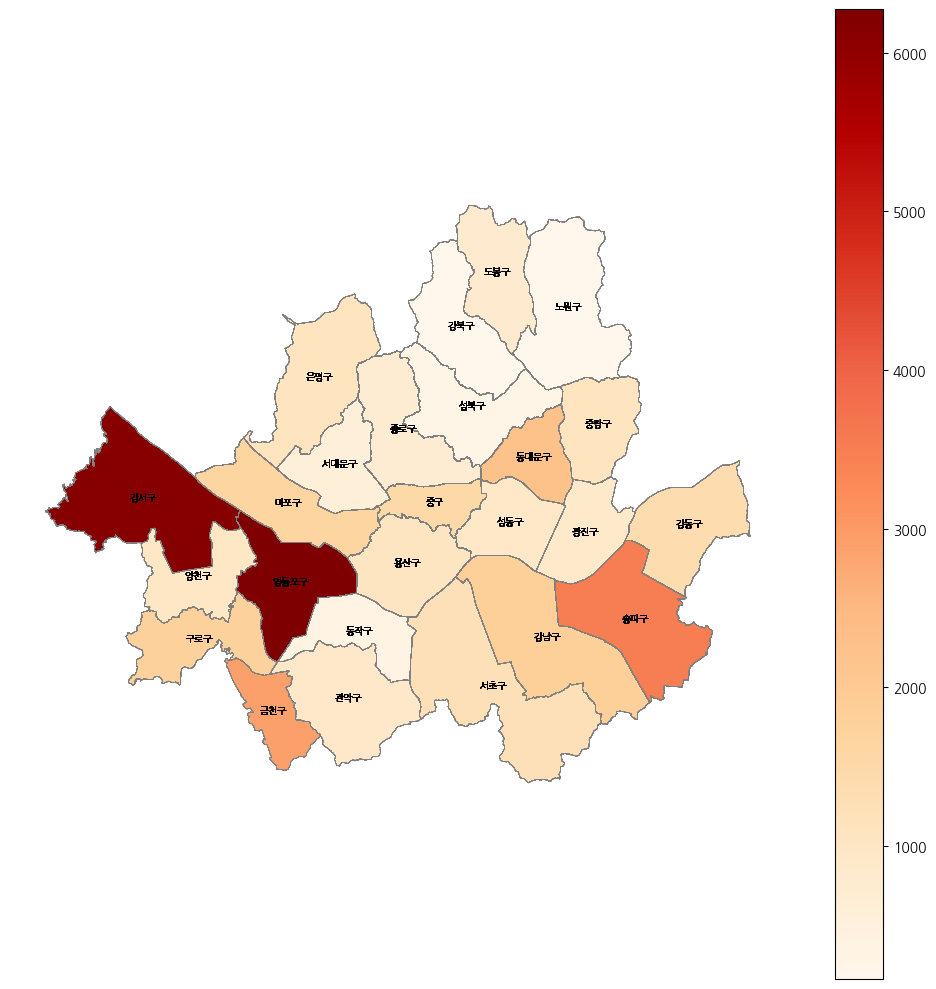

In [53]:
df = pd.read_csv('D:/SDC_project/combined_coords_officetel.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/map_visualization/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
plt.savefig('seoul_officetel_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
officetel23_deal = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/오피스텔(매매)_실거래가_2023.csv', header=15, encoding='cp949')
officetel24_deal = pd.read_csv('D:/SDC_project/data_yena/실거래가 원본/오피스텔(매매)_실거래가_2024.csv', header=15, encoding='cp949')

In [55]:
officetel23_deal['계약시기'] = pd.to_datetime(officetel23_deal['계약년월'].astype(str) + officetel23_deal['계약일'].astype(str))
officetel24_deal['계약시기'] = pd.to_datetime(officetel24_deal['계약년월'].astype(str) + officetel24_deal['계약일'].astype(str))

In [56]:
officetel23_deal = officetel23_deal[officetel23_deal['계약시기']>='2023-06-01']
officetel23_deal

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,매수,매도,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,계약시기
0,1,서울특별시 송파구 잠실동,336-8,336,8,뜨레피움1차,19.2900,202312,30,"17,000",6,-,-,2018.0,삼전로 53,-,중개거래,서울 송파구,2023-12-30
1,2,서울특별시 서초구 서초동,1445-1,1445,1,해링턴 타워 서초,42.1013,202312,30,"72,000",12,-,-,2023.0,효령로 310,-,중개거래,서울 서초구,2023-12-30
2,3,서울특별시 강남구 역삼동,825-24,825,24,강남역 효성해링턴 타워 더퍼스트,24.7700,202312,30,"27,700",14,-,-,2014.0,강남대로84길 15,-,중개거래,서울 강남구,2023-12-30
3,4,서울특별시 동작구 신대방동,698,698,0,신라스테이해링턴타워,20.3400,202312,30,"15,000",5,-,-,2015.0,시흥대로 596,-,중개거래,서울 동작구,2023-12-30
4,5,서울특별시 종로구 구기동,110-1,110,1,요진오피스텔쉐레이,31.7300,202312,30,"13,500",5,-,-,1989.0,진흥로 432,-,중개거래,서울 종로구,2023-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5414,5415,서울특별시 성동구 성수동2가,277-37,277,37,성원상떼뷰오피스텔,24.8400,202306,1,"15,400",7,-,-,2003.0,아차산로15길 10,-,중개거래,서울 성동구,2023-06-01
5415,5416,서울특별시 노원구 상계동,1262,1262,0,하이베라스,38.2800,202306,1,"15,000",6,-,-,2003.0,동일로 1689,20230629,중개거래,서울 노원구,2023-06-01
5416,5417,서울특별시 강남구 도곡동,467-24,467,24,우성캐릭터199,45.9300,202306,1,"45,000",15,-,-,1998.0,언주로 118,-,중개거래,서울 강남구,2023-06-01
5417,5418,서울특별시 강남구 도곡동,467-24,467,24,우성캐릭터199,39.3100,202306,1,"32,000",25,-,-,1998.0,언주로 118,-,중개거래,서울 강남구,2023-06-01


In [57]:
officetel23_deal['구'] = officetel23_deal['시군구'].str.extract(r'(\S+구)')
officetel24_deal['구'] = officetel24_deal['시군구'].str.extract(r'(\S+구)')

In [58]:
officetel_sale_df = pd.concat([officetel23_deal,officetel24_deal])
officetel_sale_df

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,매수,매도,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,계약시기,구
0,1,서울특별시 송파구 잠실동,336-8,336,8,뜨레피움1차,19.2900,202312,30,"17,000",6,-,-,2018.0,삼전로 53,-,중개거래,서울 송파구,2023-12-30,송파구
1,2,서울특별시 서초구 서초동,1445-1,1445,1,해링턴 타워 서초,42.1013,202312,30,"72,000",12,-,-,2023.0,효령로 310,-,중개거래,서울 서초구,2023-12-30,서초구
2,3,서울특별시 강남구 역삼동,825-24,825,24,강남역 효성해링턴 타워 더퍼스트,24.7700,202312,30,"27,700",14,-,-,2014.0,강남대로84길 15,-,중개거래,서울 강남구,2023-12-30,강남구
3,4,서울특별시 동작구 신대방동,698,698,0,신라스테이해링턴타워,20.3400,202312,30,"15,000",5,-,-,2015.0,시흥대로 596,-,중개거래,서울 동작구,2023-12-30,동작구
4,5,서울특별시 종로구 구기동,110-1,110,1,요진오피스텔쉐레이,31.7300,202312,30,"13,500",5,-,-,1989.0,진흥로 432,-,중개거래,서울 종로구,2023-12-30,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,10938,서울특별시 송파구 방이동,50-3,50,3,잠실 리버리치,42.0900,202401,2,"72,239",8,법인,개인,2023.0,오금로11길 65,-,직거래,-,2024-01-02,송파구
10938,10939,서울특별시 송파구 가락동,79-7,79,7,(79-7),29.5200,202401,2,"11,000",10,개인,개인,1990.0,송파대로28길 32,-,중개거래,서울 송파구,2024-01-02,송파구
10939,10940,서울특별시 강서구 공항동,49-1,49,1,이스카이오피스텔,27.9800,202401,2,"13,000",7,개인,개인,2011.0,공항대로 18-1,-,중개거래,서울 강서구,2024-01-02,강서구
10940,10941,서울특별시 관악구 봉천동,1659-4,1659,4,동림오피스텔,25.1900,202401,1,"20,600",12,개인,개인,2004.0,남부순환로 1924,-,중개거래,서울 관악구,2024-01-01,관악구


In [59]:
officetel_sale_df['거래금액(만원)'] = officetel_sale_df['거래금액(만원)'].astype(str).str.replace(',', '', regex=False)
officetel_sale_df['거래금액(만원)'] = pd.to_numeric(officetel_sale_df['거래금액(만원)']).astype(int)

In [60]:
officetel_df = officetel_df[officetel_df['층']>=-1]
officetel_sale_df = officetel_sale_df[officetel_sale_df['층']>=-1]

In [61]:
officetel_df['평균전세금'] = officetel_df.groupby('구')['전세금'].transform('mean')
officetel_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,계약시기,구,동,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,주택유형,평균전세금
4,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,...,2023-12-30,동대문구,답십리동,1,24.0,0,0,0,오피스텔,22781.873850
5,6,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,2023-12-30,도봉구,창동,0,24.0,0,0,0,오피스텔,19368.935032
6,7,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,27.79,202312,30,...,2023-12-30,중랑구,신내동,0,24.0,0,0,0,오피스텔,23216.768603
13,14,서울특별시 동대문구 전농동,620-15,620,15,청량리역 우남SL타워300,전세,18.43,202312,30,...,2023-12-30,동대문구,전농동,0,24.0,0,0,0,오피스텔,22781.873850
16,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,2023-12-30,도봉구,창동,0,24.0,0,0,0,오피스텔,19368.935032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84138,84139,서울특별시 은평구 응암동,599-38,599,38,위산엘리시움,전세,33.85,202401,1,...,2024-01-01,은평구,응암동,0,12.0,0,0,0,오피스텔,19076.149684
84142,84143,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,29.90,202401,1,...,2024-01-01,중랑구,신내동,0,24.0,0,0,0,오피스텔,23216.768603
84145,84146,서울특별시 성북구 동선동1가,85-65,85,65,.,전세,17.72,202401,1,...,2024-01-01,성북구,동선동1가,0,24.0,0,0,0,오피스텔,18970.422383
84150,84151,서울특별시 중구 중림동,363,363,0,쌍용 더 플래티넘 서울역,전세,17.25,202401,1,...,2024-01-01,중구,중림동,0,24.0,0,0,0,오피스텔,26974.561671


In [62]:
officetel_sale_df['평균매매가'] = officetel_sale_df.groupby('구')['거래금액(만원)'].transform('mean')
officetel_sale_df

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,매수,매도,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,계약시기,구,평균매매가
0,1,서울특별시 송파구 잠실동,336-8,336,8,뜨레피움1차,19.2900,202312,30,17000,...,-,-,2018.0,삼전로 53,-,중개거래,서울 송파구,2023-12-30,송파구,39317.913675
1,2,서울특별시 서초구 서초동,1445-1,1445,1,해링턴 타워 서초,42.1013,202312,30,72000,...,-,-,2023.0,효령로 310,-,중개거래,서울 서초구,2023-12-30,서초구,29272.675410
2,3,서울특별시 강남구 역삼동,825-24,825,24,강남역 효성해링턴 타워 더퍼스트,24.7700,202312,30,27700,...,-,-,2014.0,강남대로84길 15,-,중개거래,서울 강남구,2023-12-30,강남구,39035.034373
3,4,서울특별시 동작구 신대방동,698,698,0,신라스테이해링턴타워,20.3400,202312,30,15000,...,-,-,2015.0,시흥대로 596,-,중개거래,서울 동작구,2023-12-30,동작구,24119.623932
4,5,서울특별시 종로구 구기동,110-1,110,1,요진오피스텔쉐레이,31.7300,202312,30,13500,...,-,-,1989.0,진흥로 432,-,중개거래,서울 종로구,2023-12-30,종로구,32860.596796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10937,10938,서울특별시 송파구 방이동,50-3,50,3,잠실 리버리치,42.0900,202401,2,72239,...,법인,개인,2023.0,오금로11길 65,-,직거래,-,2024-01-02,송파구,39317.913675
10938,10939,서울특별시 송파구 가락동,79-7,79,7,(79-7),29.5200,202401,2,11000,...,개인,개인,1990.0,송파대로28길 32,-,중개거래,서울 송파구,2024-01-02,송파구,39317.913675
10939,10940,서울특별시 강서구 공항동,49-1,49,1,이스카이오피스텔,27.9800,202401,2,13000,...,개인,개인,2011.0,공항대로 18-1,-,중개거래,서울 강서구,2024-01-02,강서구,19854.480026
10940,10941,서울특별시 관악구 봉천동,1659-4,1659,4,동림오피스텔,25.1900,202401,1,20600,...,개인,개인,2004.0,남부순환로 1924,-,중개거래,서울 관악구,2024-01-01,관악구,16304.567164


In [63]:
# 구별 평균 매매가 계산
sale_avg_by_gu = officetel_sale_df.groupby('구')['거래금액(만원)'].mean().reset_index(name='평균매매가')
sale_avg_by_gu

,구,평균매매가
0,강남구,39035.034373
1,강동구,19553.856269
2,강북구,16944.803922
3,강서구,19854.480026
4,관악구,16304.567164
5,광진구,27834.675926
6,구로구,22283.214953
7,금천구,38504.523529
8,노원구,18897.936782
9,도봉구,21958.141414


In [64]:
officetel_df = officetel_df.merge(sale_avg_by_gu, on='구', how='left')

In [65]:
officetel_df['전세가율'] = officetel_df['평균전세금'] / officetel_df['평균매매가'] * 100
officetel_df

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,동,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,주택유형,평균전세금,평균매매가,전세가율
0,5,서울특별시 동대문구 답십리동,497-23,497,23,청계 푸르지오시티,전세,20.62,202312,30,...,답십리동,1,24.0,0,0,0,오피스텔,22781.873850,20222.424843,112.656489
1,6,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,창동,0,24.0,0,0,0,오피스텔,19368.935032,21958.141414,88.208445
2,7,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,27.79,202312,30,...,신내동,0,24.0,0,0,0,오피스텔,23216.768603,23152.475352,100.277695
3,14,서울특별시 동대문구 전농동,620-15,620,15,청량리역 우남SL타워300,전세,18.43,202312,30,...,전농동,0,24.0,0,0,0,오피스텔,22781.873850,20222.424843,112.656489
4,17,서울특별시 도봉구 창동,749-15,749,15,라르플레이스2단지,전세,29.16,202312,30,...,창동,0,24.0,0,0,0,오피스텔,19368.935032,21958.141414,88.208445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40542,84139,서울특별시 은평구 응암동,599-38,599,38,위산엘리시움,전세,33.85,202401,1,...,응암동,0,12.0,0,0,0,오피스텔,19076.149684,17311.139651,110.195805
40543,84143,서울특별시 중랑구 신내동,835,835,0,베네스트로프트(BENEST LOFT),전세,29.90,202401,1,...,신내동,0,24.0,0,0,0,오피스텔,23216.768603,23152.475352,100.277695
40544,84146,서울특별시 성북구 동선동1가,85-65,85,65,.,전세,17.72,202401,1,...,동선동1가,0,24.0,0,0,0,오피스텔,18970.422383,21492.071429,88.267073
40545,84151,서울특별시 중구 중림동,363,363,0,쌍용 더 플래티넘 서울역,전세,17.25,202401,1,...,중림동,0,24.0,0,0,0,오피스텔,26974.561671,26865.436314,100.406192


In [66]:
officetel_df['전세가율'].describe()

count    40547.000000
mean        86.573624
std         17.169872
min         52.565488
25%         71.238358
50%         88.582632
75%        101.022387
max        112.656489
Name: 전세가율, dtype: float64

<Axes: >

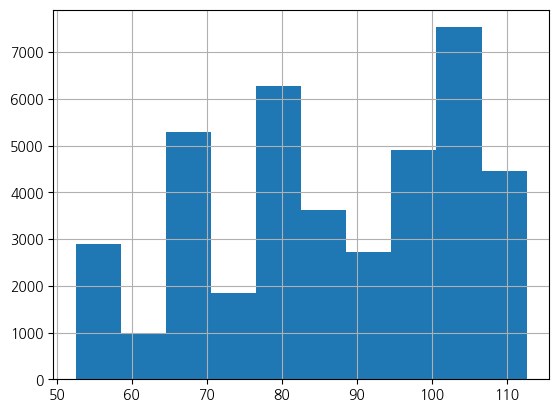

In [67]:
officetel_df['전세가율'].hist()

In [68]:
officetel_df['전세가율'].value_counts()

전세가율
76.978926     6275
101.022387    6161
69.413980     3511
52.565488     2905
112.656489    2283
71.238358     1856
98.516697     1772
88.582632     1665
100.406192    1508
105.873248    1371
89.618921     1214
110.195805    1109
100.277695    1102
70.114641     1052
59.307081      975
94.170993      935
107.098222     914
85.371215      894
88.208445      785
69.812246      720
91.653732      585
94.805017      339
88.267073      277
98.763994      178
110.275767     161
Name: count, dtype: int64

In [69]:
officetel_df[officetel_df.duplicated()]

,NO,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,...,동,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,주택유형,평균전세금,평균매매가,전세가율


In [70]:
officetel_df.isnull().sum()

NO                                0
시군구                               0
번지                                0
본번                                0
부번                                0
단지명                               0
전월세구분                             0
전용면적(㎡)                           0
계약년월                              0
계약일                               0
전세금                               0
월세금(만원)                           0
층                                 0
건축년도                              0
도로명                               0
계약기간                              0
계약구분                              0
갱신요구권 사용                          0
종전계약 보증금(만원)                      0
종전계약 월세(만원)                       0
계약시기                              0
구                                 0
동                                 0
전세전환_갱신                           0
계약개월수                             0
is_계약개월수_missing                  0
is_갱신요구권_사용_originally_missing    0
is_건축년도_missing             

In [71]:
officetel_df = officetel_df[['시군구','구','동', '전용면적(㎡)', '계약년월', '계약일', '전세금', '건축년도', '도로명', '계약기간', '계약구분', '갱신요구권 사용', '종전계약 보증금(만원)', '종전계약 월세(만원)', '주택유형', '계약시기', '전세전환_갱신', '계약개월수', 'is_계약개월수_missing', 'is_갱신요구권_사용_originally_missing', 'is_건축년도_missing','평균전세금','평균매매가','전세가율']]
officetel_df

,시군구,구,동,전용면적(㎡),계약년월,계약일,전세금,건축년도,도로명,계약기간,...,주택유형,계약시기,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,평균전세금,평균매매가,전세가율
0,서울특별시 동대문구 답십리동,동대문구,답십리동,20.62,202312,30,13000,2015.0,천호대로 257,202401~202601,...,오피스텔,2023-12-30,1,24.0,0,0,0,22781.873850,20222.424843,112.656489
1,서울특별시 도봉구 창동,도봉구,창동,29.16,202312,30,18600,2019.0,도봉로136길 19,202401~202601,...,오피스텔,2023-12-30,0,24.0,0,0,0,19368.935032,21958.141414,88.208445
2,서울특별시 중랑구 신내동,중랑구,신내동,27.79,202312,30,18000,2021.0,용마산로 636,202312~202512,...,오피스텔,2023-12-30,0,24.0,0,0,0,23216.768603,23152.475352,100.277695
3,서울특별시 동대문구 전농동,동대문구,전농동,18.43,202312,30,21000,2023.0,왕산로 186,202401~202601,...,오피스텔,2023-12-30,0,24.0,0,0,0,22781.873850,20222.424843,112.656489
4,서울특별시 도봉구 창동,도봉구,창동,29.16,202312,30,18600,2019.0,도봉로136길 19,-,...,오피스텔,2023-12-30,0,24.0,0,0,0,19368.935032,21958.141414,88.208445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40542,서울특별시 은평구 응암동,은평구,응암동,33.85,202401,1,23300,2021.0,응암로11길 8,202401~202501,...,오피스텔,2024-01-01,0,12.0,0,0,0,19076.149684,17311.139651,110.195805
40543,서울특별시 중랑구 신내동,중랑구,신내동,29.90,202401,1,20000,2021.0,용마산로 636,202401~202601,...,오피스텔,2024-01-01,0,24.0,0,0,0,23216.768603,23152.475352,100.277695
40544,서울특별시 성북구 동선동1가,성북구,동선동1가,17.72,202401,1,8400,2013.0,동소문로24길 36,202401~202601,...,오피스텔,2024-01-01,0,24.0,0,0,0,18970.422383,21492.071429,88.267073
40545,서울특별시 중구 중림동,중구,중림동,17.25,202401,1,22000,2023.0,청파로 454,202402~202602,...,오피스텔,2024-01-01,0,24.0,0,0,0,26974.561671,26865.436314,100.406192


In [72]:
# officetel_df = officetel_df.drop_duplicates()

In [73]:
officetel_df[officetel_df.duplicated()]

,시군구,구,동,전용면적(㎡),계약년월,계약일,전세금,건축년도,도로명,계약기간,...,주택유형,계약시기,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,평균전세금,평균매매가,전세가율
87,서울특별시 강서구 마곡동,강서구,마곡동,20.82,202312,29,15520,2016.0,,-,...,오피스텔,2023-12-29,0,24.0,0,0,0,20057.469729,19854.480026,101.022387
151,서울특별시 강서구 염창동,강서구,염창동,27.64,202312,29,21900,2020.0,양천로65길 40,-,...,오피스텔,2023-12-29,0,24.0,0,0,0,20057.469729,19854.480026,101.022387
214,서울특별시 서대문구 북아현동,서대문구,북아현동,20.98,202312,28,26000,2023.0,신촌로33길 16,202401~202601,...,오피스텔,2023-12-28,0,24.0,0,0,0,21405.179487,23354.400341,91.653732
273,서울특별시 강동구 천호동,강동구,천호동,27.06,202312,27,23000,2021.0,천호대로161길 7,202402~202602,...,오피스텔,2023-12-27,0,24.0,0,0,0,20702.302699,19553.856269,105.873248
628,서울특별시 영등포구 신길동,영등포구,신길동,17.80,202312,22,12000,2014.0,신길로38길 12,202401~202601,...,오피스텔,2023-12-22,0,24.0,0,0,0,27232.333865,35376.349294,76.978926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39557,서울특별시 구로구 고척동,구로구,고척동,19.01,202401,13,15000,2021.0,중앙로 18,202402~202602,...,오피스텔,2024-01-13,0,24.0,0,0,0,21952.687359,22283.214953,98.516697
39650,서울특별시 송파구 문정동,송파구,문정동,25.33,202401,12,19800,-1.0,,202402~202602,...,오피스텔,2024-01-12,0,24.0,0,0,1,27292.128738,39317.913675,69.413980
39668,서울특별시 영등포구 영등포동3가,영등포구,영등포동3가,23.79,202401,12,27000,2023.0,영등포로46길 6,202402~202602,...,오피스텔,2024-01-12,0,24.0,0,0,0,27232.333865,35376.349294,76.978926
39721,서울특별시 송파구 방이동,송파구,방이동,24.12,202401,11,26000,2023.0,올림픽로34길 5-14,202402~202602,...,오피스텔,2024-01-11,0,24.0,0,0,0,27292.128738,39317.913675,69.413980


In [74]:
officetel_df

,시군구,구,동,전용면적(㎡),계약년월,계약일,전세금,건축년도,도로명,계약기간,...,주택유형,계약시기,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,평균전세금,평균매매가,전세가율
0,서울특별시 동대문구 답십리동,동대문구,답십리동,20.62,202312,30,13000,2015.0,천호대로 257,202401~202601,...,오피스텔,2023-12-30,1,24.0,0,0,0,22781.873850,20222.424843,112.656489
1,서울특별시 도봉구 창동,도봉구,창동,29.16,202312,30,18600,2019.0,도봉로136길 19,202401~202601,...,오피스텔,2023-12-30,0,24.0,0,0,0,19368.935032,21958.141414,88.208445
2,서울특별시 중랑구 신내동,중랑구,신내동,27.79,202312,30,18000,2021.0,용마산로 636,202312~202512,...,오피스텔,2023-12-30,0,24.0,0,0,0,23216.768603,23152.475352,100.277695
3,서울특별시 동대문구 전농동,동대문구,전농동,18.43,202312,30,21000,2023.0,왕산로 186,202401~202601,...,오피스텔,2023-12-30,0,24.0,0,0,0,22781.873850,20222.424843,112.656489
4,서울특별시 도봉구 창동,도봉구,창동,29.16,202312,30,18600,2019.0,도봉로136길 19,-,...,오피스텔,2023-12-30,0,24.0,0,0,0,19368.935032,21958.141414,88.208445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40542,서울특별시 은평구 응암동,은평구,응암동,33.85,202401,1,23300,2021.0,응암로11길 8,202401~202501,...,오피스텔,2024-01-01,0,12.0,0,0,0,19076.149684,17311.139651,110.195805
40543,서울특별시 중랑구 신내동,중랑구,신내동,29.90,202401,1,20000,2021.0,용마산로 636,202401~202601,...,오피스텔,2024-01-01,0,24.0,0,0,0,23216.768603,23152.475352,100.277695
40544,서울특별시 성북구 동선동1가,성북구,동선동1가,17.72,202401,1,8400,2013.0,동소문로24길 36,202401~202601,...,오피스텔,2024-01-01,0,24.0,0,0,0,18970.422383,21492.071429,88.267073
40545,서울특별시 중구 중림동,중구,중림동,17.25,202401,1,22000,2023.0,청파로 454,202402~202602,...,오피스텔,2024-01-01,0,24.0,0,0,0,26974.561671,26865.436314,100.406192


In [75]:
officetel_df.to_csv('오피스텔_전세가율(중복허용).csv')